# Absrtact:
- This project uses a dataset which contains approximately 34,000 brain MRI images taken of patients with mild, moderate and non-demented brains.

- The goal of this project is to apply data science and machine learning techniques and principles to make two machine learning models that classify any given brain MRI image to know the degree (or lack of) of dementia based solely on the patient MRI scan

- The skills used to make this project are (but not limited to) the following:
    1. Applying preprocessing on the raw data set, methods include (but not limited to):
        - Converting the images to grayscale (black and white).
        - Resizing the images.
        - Converting the images into vertices.
        - Stacking said vertices to 3 channels.
        - Ensuring that the images are to the required dimensions (if not resizing said images).
        - Processing the images to be fed into a CNN.
        - Feature extraction by said CNN.
    2. Applying resampling techniques.
        - Undersampling and oversampling.
    3. Training two ensemble machine learning models:
        - One bagging based model the other boosting.
    4. Trainging each model on the processed, clean data.
    5. Calculating the perfomence for each model using the following metrics:
        - Accuracy
        - Precision
        - Recall
        - F1-score
        - Area Under the Curve (AUC for short)
    6. HyperParameter tuning and optimizing the models using Random Search Cross-Validation.
    7. Making the models ready for deployment by saving hypertuned models and providing an API.


- Made by:
    - Montaser Ayasrah
    - Abd-Alrahman Arabiat

#### NOTE: This notebook is a part of the final project for the "Machine Learning Lab" course.

### The Dataset

The dataset is split into 3 classes: Non-Demented, Mild Demented and Moderate Demented.
        
#### Defining the dataset files path:

In [ ]:
import os


filepaths = r"d:\dev\ML lab\Final Project\AlzheimerProject\AlzheimerDataset"
os.chdir(filepaths)

resampledPath = r"d:\dev\ML lab\Final Project\AlzheimerProject\ResampledDataset"

MildDementedPath, ModerateDementedPath, NonDementedPath = map(
    lambda x: os.path.join(filepaths, x),
    os.listdir(filepaths),
)

print(
    "Images Paths:",
    MildDementedPath,
    ModerateDementedPath,
    NonDementedPath,
    sep="\n",
)

Images Paths:
d:\dev\ML lab\Final Project\AlzheimerProject\AlzheimerDataset\MildDemented
d:\dev\ML lab\Final Project\AlzheimerProject\AlzheimerDataset\ModerateDemented
d:\dev\ML lab\Final Project\AlzheimerProject\AlzheimerDataset\NonDemented


### Sample Images:
To get an idea of the data and the classes.

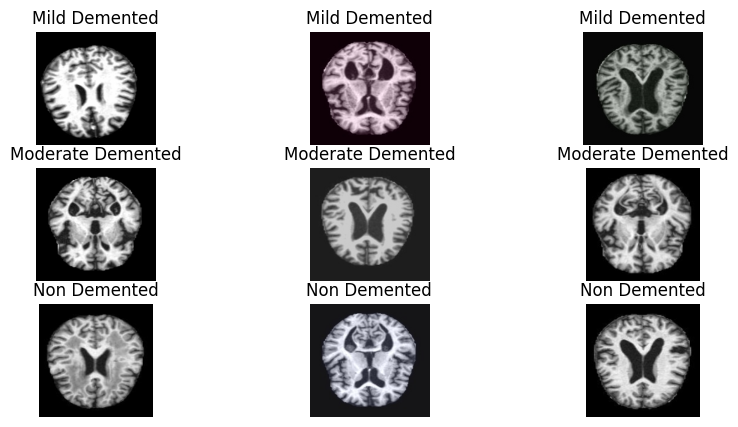

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


fig, axs = plt.subplots(3, 3, figsize=(10, 5))

for i, imgPath in enumerate(os.listdir(MildDementedPath)[:3]):
    img = os.path.join(MildDementedPath, imgPath)
    img = mpimg.imread(img)

    axs[i // 3, i % 3].imshow(img)
    axs[i // 3, i % 3].axis("off")
    axs[i // 3, i % 3].set_title("Mild Demented")

for i, imgPath in enumerate(os.listdir(ModerateDementedPath)[:3]):
    img = os.path.join(ModerateDementedPath, imgPath)
    img = mpimg.imread(img)

    axs[(i + 3) // 3, (i + 3) % 3].imshow(img)
    axs[(i + 3) // 3, (i + 3) % 3].axis("off")
    axs[(i + 3) // 3, (i + 3) % 3].set_title("Moderate Demented")

for i, imgPath in enumerate(os.listdir(NonDementedPath)[:3]):
    img = os.path.join(NonDementedPath, imgPath)
    img = mpimg.imread(img)

    axs[(i + 6) // 3, (i + 6) % 3].imshow(img)
    axs[(i + 6) // 3, (i + 6) % 3].axis("off")
    axs[(i + 6) // 3, (i + 6) % 3].set_title("Non Demented")

plt.show()

# Resampling
We define the paths of the individual classes

In [24]:
# Number of images in each category
MildDementedNum = len(os.listdir(MildDementedPath))
ModerateDementedNum = len(os.listdir(ModerateDementedPath))
NonDementedNum = len(os.listdir(NonDementedPath))

print(f"{MildDementedNum} Mild Demented images", \
          f"{ModerateDementedNum} Moderate Demented images", \
              f"{NonDementedNum} Non Demented images", sep="\n")

17920 Mild Demented images
6464 Moderate Demented images
9600 Non Demented images


In [25]:
# Calculating the average number of images per class
avg = (MildDementedNum + ModerateDementedNum + NonDementedNum) / 3
print(f"Average number of images per class: {avg}")

Average number of images per class: 11328.0


# Undersampling
We need to undersample the majority class (Mild Demented) images to match the average number of images in each class.

In [26]:
# Number of images to be removed from the majority class:
imagesNumToRemove = MildDementedNum - avg

print(
    f"Number of images to be removed from Mild Demented class: \
        {imagesNumToRemove}"
)

Number of images to be removed from Mild Demented class:         6592.0


## Defining the Undersampling fucntion:
This fucntion takes a directory then removes a random given number of images for said directory then copies the remaining images to a new specified directory.

In [27]:
def UnderSampler(inputDir, outputDir, numToRemove):
    """Removes a number of images from the input directory and saves the rest in the output directory.

    Args:
        inputDir (str): The path to the input directory.
        outputDir (str): The path to the output directory.
        numToRemove (int): The number of images to remove from the input directory.
    """
    from numpy.random import choice
    import shutil

    if not os.path.exists(outputDir):
        os.makedirs(outputDir)

    imgsPaths = os.listdir(inputDir)
    numOfImages = len(imgsPaths)

    imgsNumToKeep = int(numOfImages - numToRemove)
    imgsToKeep = choice(
        imgsPaths,
        imgsNumToKeep,
        replace=False,
    )

    for imgToKeep in imgsToKeep:
        shutil.copy(
            os.path.join(inputDir, imgToKeep),
            os.path.join(outputDir, imgToKeep),
        )

#### Calling the Undersampling function on majority class:

In [28]:
# Define the paths for uversampling:
undersampledPath = os.path.join(resampledPath, "Mild Demented")

# Uversample the "Mild Demented" class:
UnderSampler(
    inputDir=MildDementedPath,
    outputDir=undersampledPath,
    numToRemove=imagesNumToRemove,
)

#### Checking the number of files in the majority class directory:

In [29]:
# Number of images in the undersampled class
numOfUndersampledImages = len(os.listdir(undersampledPath))
numOfUndersampledImages

15514

# Oversampling
- We need to oversample the two minority classes to the average number of images per class.

- The technique used here is to initialize a image data generater to modify randomly selected images from the minority class

- The modifications include:
    * Randomly shifting the width of the selected image within a given range.
    * Randomly rotating the selected image within a given range.
    * Randomly shifting the height of the selected image within a given range.
    * Randomly adjusting the shear range of the selected image within a given range.
    * Randomly zooming in and out the selected image within a given range.
    * Randomly fliping the image on its horizontal axes.

- Minority class ModerateDemented and minority class NonDemented.

In [30]:
# Number of images to be generated for each minority class
imagesToGenerateForModerateDemented = avg - ModerateDementedNum
imagesToGenerateForNonDemented = avg - NonDementedNum

print(
    f"Number of images to be generated for Moderate Demented class: \
        {imagesToGenerateForModerateDemented}",
    f"Number of images to be generated for Non Demented class: \
        {imagesToGenerateForNonDemented}", sep="\n"
)

Number of images to be generated for Moderate Demented class:         4864.0
Number of images to be generated for Non Demented class:         1728.0


#### Initializing the image data generator:

In [31]:
# Imports:
from tensorflow.keras.preprocessing.image import( # type: ignore
    ImageDataGenerator,
    img_to_array,
    array_to_img,
    load_img
)

In [32]:
# Initializing the ImageDataGenerator with the optimal augmentation parameters:
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.07,
    height_shift_range=0.07,
    shear_range=0.2,
    zoom_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

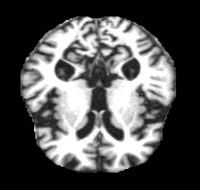

In [33]:
# Testing the generator on a single image:
imageTestGenPath = r"d:\dev\ML lab\Final Project\AlzheimerProject\testMriImage.jpg"
imgTestGen = load_img(imageTestGenPath)
imgTestGen

In [34]:
# Convert the image to a numpy array and reshaping the image:
imgTestGenArray = img_to_array(imgTestGen)
imgTestGenArray = imgTestGenArray.reshape((1,) + imgTestGenArray.shape)
imgTestGenArray.shape

(1, 190, 200, 3)

In [35]:
# Initialize an instance of the generator:
imgsTestGenGen = datagen.flow(
    imgTestGenArray,
    batch_size=1,
)

'Original Image: '

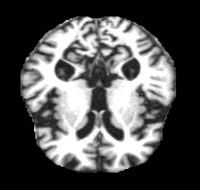

'Augmented Image: '

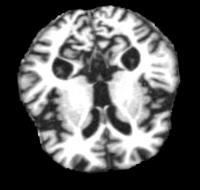

In [36]:
# Getting the generated images:
imgsTestGenAug = next(imgsTestGenGen)
# Converting the image array to an image:
imgTestGenAug = array_to_img(imgsTestGenAug[0])

display("Original Image: ", imgTestGen)
display("Augmented Image: ", imgTestGenAug)

### Defining the Oversampling function:

In [37]:
# Defining the Oversampler function:
def OverSampler(inputDir, outputDir, numToGenerate):
    """
    Oversamples images from the input directory and saves the generated images to the output directory.

    Args:
        inputDir (str): The path to the directory containing the input images.
        outputDir (str): The path to the directory where the generated images will be saved.
        numToGenerate (int): The number of images to generate.

    Returns:
        None
    """
    from numpy.random import choice # type: ignore
    import shutil

    if not os.path.exists(outputDir):
        os.makedirs(outputDir)

    imgsPaths = os.listdir(inputDir)

    imgsToGenFrom = choice(
        imgsPaths,
        int(numToGenerate),
        replace=False,
    )

    for idx, imgToGenFrom in enumerate(imgsToGenFrom):
        img = load_img(os.path.join(inputDir, imgToGenFrom))
        imgArray = img_to_array(img)
        imgArray = imgArray.reshape((1,) + imgArray.shape)

        imgGen = datagen.flow(
            imgArray,
            batch_size=1,
            save_to_dir=outputDir,
            save_prefix=f"aug_{idx}_",
            save_format="jpg",
        )
        
        array_to_img(next(imgGen)[0])
       
    for imgPath in imgsPaths:
        shutil.copy(
            os.path.join(inputDir, imgPath),
            os.path.join(outputDir, imgPath),
        )

### Calling the Oversampling function on the two minority classes:

In [38]:
# Define the paths for oversampling
mederateDementedOversampledPath = os.path.join(
    resampledPath,
    "Moderate Demented",
)
nonDementedOversampledPath = os.path.join(
    resampledPath,
    "Non Demented",
)

# Oversample the "Moderate Demented" class
OverSampler(
    inputDir=ModerateDementedPath,
    outputDir=mederateDementedOversampledPath,
    numToGenerate=imagesToGenerateForModerateDemented,
)

# Oversample the "Non Demented" class
OverSampler(
    inputDir=NonDementedPath,
    outputDir=nonDementedOversampledPath,
    numToGenerate=imagesToGenerateForNonDemented,
)

### Checking the number of files in the minority classes directories:

In [20]:
# Number of oversampled images
numOfOversampledModerateDementedImages = len(
    os.listdir(mederateDementedOversampledPath),
)
numOfOversampledNonDementedImages = len(
    os.listdir(nonDementedOversampledPath),
)

# Display the number of oversampled images:
print(
    f"Number of oversampled Moderate Demented images: \
        {numOfOversampledModerateDementedImages}",
    f"Number of oversampled Non Demented images: \
        {numOfOversampledNonDementedImages}",
    sep="\n",
)

Number of oversampled Moderate Demented images:         11328
Number of oversampled Non Demented images:         11328


# Image Preprocessing:
### Here we need to define two function:
- The first one does the first round of preprocessing, this includes:
    1. Converting the image to grayscale (black and white).
    2. Resizing the image to make it in the optimal dimensions for further processing.
    3. Converting the image into a numpy array.
    4. Stacking the image vertices to make it 3 channels.
    5. Ensuring that the image is in the required shape.
    6. Process the image for input in the second function.
         
- The socond function does the feature extraction using a pre-trained CNN (VGG16)

In [97]:
# Imports:
import os
import numpy as np
from PIL import Image
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input # type: ignore
from tensorflow.keras.models import Model # type: ignore
from tensorflow.keras.preprocessing.image import img_to_array # type: ignore
from sklearn.model_selection import train_test_split

In [136]:
def load_and_preprocess_image(image_path, image_size=(224, 224)):
    """Load and preprocess an image from the given path.

    Args:
        image_path (str): The path to the image.
        image_size (tuple, int): The to reshape the images accourding to. Defaults to (224, 224).

    Returns:
        np.array: The preprocessed image.
    """
    img = Image.open(image_path).convert('L')  # Convert to grayscale
    img_array = img_to_array(img)  # Convert to array
    img_array = img.resize(image_size)  # Resize image------------------------------------------------------------------img = img.resize(image_size)
    img_array = np.stack((img_array,) * 3, axis=-1)  # Stack to make 3 channels
    img_array = img_array.reshape((image_size[0], image_size[1], 3,))  # Ensure the shape is correct
    return preprocess_input(img_array)  # Preprocess the image

In [ ]:
def preprocess_images_with_cnn(image_dirs, image_size=(224, 224), batch_size=32):
    """
    Preprocess images by converting to grayscale, resizing, and extracting features using a pre-trained CNN (VGG16).

    Parameters:
    image_dirs (dict): A dictionary where keys are class names and values are directories containing images of that class.
    image_size (tuple): Desired image size. Default is (224, 224).
    batch_size (int): Batch size for processing images. Default is 32.

    Returns:
    X (numpy.ndarray): Array of feature vectors.
    y (numpy.ndarray): Array of labels.
    """
    # Load VGG16 model + higher level layers
    base_model = VGG16(
        weights="imagenet", # We are initializing our VGG16 model with the weights that were learned from training on the ImageNet dataset.
        include_top=False,      # The final fully connected layer of the model, which is responsible for classifying the features extracted by
                            # the previous layers into the 1000 ImageNet classes, is not loaded. We do this because we want to use the model for a different classification task.
        pooling="avg",  # Global average pooling will be applied to the output of the last convolutional layer of the VGG16 model, and that will be the output of the model.
        # Global average pooling is a method to reduce the spatial dimensions of a three-dimensional tensor to a single dimension.
    )
    model = Model(inputs=base_model.input, outputs=base_model.output)

    image_paths = []
    labels = []

    for class_name, directory in image_dirs.items():
        for filename in os.listdir(directory):
            if filename.endswith((".png", ".jpg", ".jpeg", ".bmp", ".gif")):
                image_paths.append(os.path.join(directory, filename))
                labels.append(class_name)

    # Convert labels to numpy array
    y = np.array(labels)

    # Prepare dataset
    def gen():
        for image_path in image_paths:
            yield load_and_preprocess_image(image_path, image_size)

    dataset = tf.data.Dataset.from_generator(
        gen, output_signature=tf.TensorSpec(shape=(224, 224, 3), dtype=tf.float32)
    ).batch(batch_size)

    # Extract features in batches
    X = []
    for batch in dataset:
        features = model.predict(batch)
        X.append(features)

    X = np.concatenate(X, axis=0)

    return X, y

In [ ]:
# Define the directories containing the resampled images:
image_dirs = {
    "Non-Demented": r"d:\dev\ML lab\Final Project\AlzheimerProject\ResampledDataset\Non Demented",
    "Mild Demented": r"d:\dev\ML lab\Final Project\AlzheimerProject\ResampledDataset\Mild Demented",
    "Moderate Demented": r"d:\dev\ML lab\Final Project\AlzheimerProject\ResampledDataset\Moderate Demented"
}
# Preprocessing the images:
X, y = preprocess_images_with_cnn(image_dirs, batch_size=64)

#### Saving the Data:
Saving the full dataset features and labels to disk as a numpy array file for future use without running the above code.

In [27]:
# Save features and labels to disk:
def SaveArrToDisk(arr, outputDir, nameArr):
    """Save a numpy array to disk.

    Args:
        arr (np.array): The numpy array to save.
        outputDir (str): The directory to save the array to.
    """
    if not os.path.exists(outputDir):
        os.makedirs(outputDir)
    
    np.save(os.path.join(outputDir, nameArr), arr)

In [ ]:
# Save features and labels to disk for future use:
SaveArrToDisk(
    X, r"d:\dev\ML lab\Final Project\AlzheimerProject\Data", "fullDatasetFeatures",
)
SaveArrToDisk(
    y, r"d:\dev\ML lab\Final Project\AlzheimerProject\Data", "fullDatasetLabels",
)

### Full Dataset train-test split:

In [30]:
# Importing the features and labels:
X = np.load(
    r"d:\dev\ML lab\Final Project\AlzheimerProject\Data\fullDatasetFeatures.npy",
)
y = np.load(
    r"d:\dev\ML lab\Final Project\AlzheimerProject\Data\fullDatasetLabels.npy",
)

In [31]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Random Forest Classifier:
##### Without hyperparameter optimization

In [32]:
# Imports:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

In [33]:
# Initializing and fitting the Random Forest Classifier:
dt_clf = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    random_state=42,
    n_jobs=-1,
)
dt_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_jobs=-1, random_state=42)

### Defining the function to show the required metrics for a given classifier

In [103]:
def MetricsReport(clf, X_test, y_test):
    """Shows the accuracy, precision, recall, f1-score, and AUC of a classifier.

    Args:
        clf (model): The classifier to evaluate.
        X_test (np.array): The test features.
        y_test (np.array): The test labels.
    Returns:
        None
    """
    from sklearn.metrics import (
        accuracy_score,
        precision_score,
        recall_score,
        f1_score,
        roc_auc_score,
    )

    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average="weighted")
    recall = recall_score(y_test, y_pred, average="weighted")
    f1 = f1_score(y_test, y_pred, average="weighted")
    auc = roc_auc_score(y_test, clf.predict_proba(X_test), multi_class="ovr")

    print(
        f"Accuracy:   {accuracy:.2f}",
        f"Precision:  {precision:.2f}",
        f"Recall:     {recall:.2f}",
        f"F1-score:   {f1:.2f}",
        f"AUC:        {auc:.2f}",
        sep="\n",
    )

In [35]:
# Display the metrics report:
MetricsReport(dt_clf, X_test, y_test)

Accuracy:   0.84
Precision:  0.84
Recall:     0.84
F1-score:   0.84
AUC:        0.95


### Defining the function to predict a new instance from a given classifier

In [6]:
def PredictNewInstance(image_path, model, *, showImage=True, imageSize=(224, 224)):
    """
    Preprocess a single image by converting to grayscale, resizing, and extracting features using a pre-trained CNN (VGG16).

    Parameters:
    image_path (str): Path to the image file.
    image_size (tuple): Desired image size. Default is (224, 224).

    Returns:
    X (numpy.ndarray): Array of feature vectors.
    """

    # Load and display image
    from tensorflow.keras.preprocessing.image import load_img  # type: ignore

    image = load_img(image_path)
    display(image) if showImage else None

    # Load VGG16 model + higher level layers
    base_model = VGG16(weights="imagenet", include_top=False, pooling="avg")
    extractor = Model(inputs=base_model.input, outputs=base_model.output)

    # Load and preprocess image
    img = load_and_preprocess_image(image_path, imageSize)
    img = img.reshape((*imageSize, 3))  # Reshape to desired shape
    img = preprocess_input(img)  # Preprocess the image

    # Extract features
    X = extractor.predict(img[np.newaxis, ...])
    prediction = model.predict(X)

    return prediction


def DEPRECATED_PredictNewInstance(
    image_path, model, *, showImage=True, imageSize=(224, 224)
):
    """
    Preprocess a single image by converting to grayscale, resizing, and extracting features using a pre-trained CNN (VGG16).

    Parameters:
    image_path (str): Path to the image file.
    image_size (tuple): Desired image size. Default is (224, 224).

    Returns:
    X (numpy.ndarray): Array of feature vectors.
    """

    # Load and display image
    from tensorflow.keras.preprocessing.image import load_img  # type: ignore

    image = load_img(image_path)
    display(image) if showImage else None

    # Load VGG16 model + higher level layers
    base_model = VGG16(
        weights="imagenet", # We are initializing our VGG16 model with the weights that were learned from training on the ImageNet dataset.
        include_top=False,  # The final fully connected layer of the model, which is responsible for classifying the features extracted by
                            # the previous layers into the 1000 ImageNet classes, is not loaded. We do this because we want to use the model for a different classification task.
        pooling="avg",      # Global average pooling will be applied to the output of the last convolutional layer of the VGG16 model, and that will be the output of the model.
                            # Global average pooling is a method to reduce the spatial dimensions of a three-dimensional tensor to a single dimension.
    )
    extractor = Model(inputs=base_model.input, outputs=base_model.output)

    # Load and preprocess image
    img = load_and_preprocess_image(image_path, imageSize)
    img = np.stack((img,) * 3, axis=-1)  # Stack to make 3 channels
    img = img.reshape((imageSize[0], imageSize[1], 3))  # Ensure the shape is correct
    img = img.reshape((imageSize[0], imageSize[1], 3))  # Ensure the shape is correct

    # Extract features
    X = extractor.predict(img[np.newaxis, ...])
    prediction = model.predict(X)

    return prediction

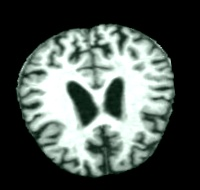

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step


'Moderate Demented'

In [137]:
# Test the function on a new image:
img_path = r"d:\dev\ML lab\Final Project\AlzheimerProject\AlzheimerDataset\MildDemented\0a3cdf7b-d2e9-4519-870b-00dc0bb4658b.jpg"
prediction_RandomForest = PredictNewInstance(img_path, dt_clf, showImage=True)
prediction_RandomForest[0]

# XGBoost Classifier
#### Without hyperparameter optimization 

In [140]:
# Imports:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

In [141]:
# Label encoding the labels:
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.transform(y_test)

In [142]:
# Initializing and fitting the XGBoost Classifier:
xgb_clf = xgb.XGBClassifier(
    booster="gblinear",
    n_estimators=100,
    random_state=42,
    n_jobs=-1,
    verbosity=1,
)
xgb_clf.fit(X_train, y_train_encoded)

XGBClassifier(base_score=None, booster='gblinear', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=-1,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [143]:
# Display the metrics report:
MetricsReport(xgb_clf, X_test, y_test_encoded)

Accuracy:   0.85
Precision:  0.85
Recall:     0.85
F1-score:   0.85
AUC:        0.95


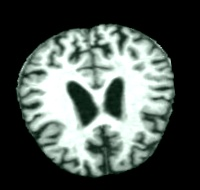

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step


'Moderate Demented'

In [144]:
# Test the function on a new image:
img_path = r"d:\dev\ML lab\Final Project\AlzheimerProject\AlzheimerDataset\MildDemented\0a3cdf7b-d2e9-4519-870b-00dc0bb4658b.jpg"
prediction_XGBoost = PredictNewInstance(img_path, xgb_clf, showImage=True)
encoder.inverse_transform(prediction_XGBoost)[0]

# Hyperparameter Tuning:
To minimize the computation and time firstly we preprocess and tune the models on a smaller sample data set.

In [145]:
# For testing purposes, wil undersample all the classes to 1000 images each.
testingsampledPath = r"d:\dev\ML lab\Final Project\AlzheimerProject\TestingResampledDataset"

# Undersample the classes:
UnderSampler(
    inputDir=r"d:\dev\ML lab\Final Project\AlzheimerProject\ResampledDataset\Mild Demented",
    outputDir=os.path.join(testingsampledPath, "Mild Demented"),
    numToRemove=11328 - 1000,
)

UnderSampler(
    inputDir=r"d:\dev\ML lab\Final Project\AlzheimerProject\ResampledDataset\Moderate Demented",
    outputDir=os.path.join(testingsampledPath, "Moderate Demented"),
    numToRemove=11328 - 1000,
)

UnderSampler(
    inputDir=r"d:\dev\ML lab\Final Project\AlzheimerProject\ResampledDataset\Non Demented",
    outputDir=os.path.join(testingsampledPath, "Non Demented"),
    numToRemove=11328 - 1000,
)

In [6]:
# Define the directories containing the resampled images:
tuningDirs = {
    "Non-Demented": r"d:\dev\ML lab\Final Project\AlzheimerProject\TestingResampledDataset\Non Demented",
    "Mild Demented": r"d:\dev\ML lab\Final Project\AlzheimerProject\TestingResampledDataset\Mild Demented",
    "Moderate Demented": r"d:\dev\ML lab\Final Project\AlzheimerProject\TestingResampledDataset\Moderate Demented",
}
# Preprocessing the images:
XTune, yTune = preprocess_images_with_cnn(tuningDirs, batch_size=64)

2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 3s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 3s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 3s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 3s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 3s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 3s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 3s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 3s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 3s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 3s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 3s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 3s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 3s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 3s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 3s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 3s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 

In [9]:
# Save tuning features and labels to disk for future use:
SaveArrToDisk(XTune, r"d:\dev\ML lab\Final Project\AlzheimerProject\Data", "tuningDatasetFeatures")
SaveArrToDisk(yTune, r"d:\dev\ML lab\Final Project\AlzheimerProject\Data", "tuningDatasetLabels")

In [146]:
# Importing the tuning features and labels:
XTune = np.load(r"d:\dev\ML lab\Final Project\AlzheimerProject\Data\tuningDatasetFeatures.npy")
yTune = np.load(r"d:\dev\ML lab\Final Project\AlzheimerProject\Data\tuningDatasetLabels.npy")

In [147]:
# Split the tuning data into training and test sets
XTune_train, XTune_test, yTune_train, yTune_test = train_test_split(
    XTune, yTune, test_size=0.2, random_state=42
)

## Random Forest Classifier Tuning:
Here we use Randomized Search Cross-Validation for hyperparameter optimization and tuning.

In [148]:
# Imports:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [149]:
# Define the parameter distributions for the RandomizedSearchCV:
param_dist = {
    "n_estimators": np.arange(10, 200, 10),   # Number of trees in the forest
    "max_depth": np.arange(3, 20, 1),         # Maximum depth of each tree
    "min_samples_split": np.arange(2, 10, 1), # Minimum number of samples required to split an internal node
    "min_samples_leaf": np.arange(1, 10, 1),  # Minimum number of samples required to be at a leaf node
    "bootstrap": [True, False],               # Whether bootstrap samples are used when building trees
    "criterion": ["gini", "entropy"],         # Function to measure the quality of a split
}

In [150]:
# Initialize the Random Forest Classifier:
rf = RandomForestClassifier()

# Set up RandomizedSearchCV
RandomForestClassifierRandomizedSearchCV = RandomizedSearchCV(
    rf,
    param_distributions=param_dist,
    n_iter=100,
    cv=5,
    random_state=42,
    n_jobs=-1,
)

In [151]:
# Fitting the RandomizedSearchCV with RandomForest Classifier:
RandomForestClassifierRandomizedSearchCV.fit(XTune_train, yTune_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
                                        'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190])},
                   random_state=42)

In [152]:
# Getting the best parameters and score
bestParamsRandomForestClassifier = RandomForestClassifierRandomizedSearchCV.best_params_
bestScoreRandomForestClassifier = RandomForestClassifierRandomizedSearchCV.best_score_

# Display the best parameters and score
print("Best parameters: ")
for key, value in bestParamsRandomForestClassifier.items():
    print(f"{key}: {value}")
    
print(f"\nBest score: {bestScoreRandomForestClassifier}")

Best parameters: 
n_estimators: 190
min_samples_split: 3
min_samples_leaf: 2
max_depth: 18
criterion: gini
bootstrap: False

Best score: 0.81375


In [153]:
# Initialize the Random Forest Classifier with hypertuned parameters:
optimizedRandomForest = RandomForestClassifier(
    n_estimators=bestParamsRandomForestClassifier["n_estimators"],
    max_depth=bestParamsRandomForestClassifier["max_depth"],
    min_samples_split=bestParamsRandomForestClassifier["min_samples_split"],
    min_samples_leaf=bestParamsRandomForestClassifier["min_samples_leaf"],
    bootstrap=bestParamsRandomForestClassifier["bootstrap"],
    criterion=bestParamsRandomForestClassifier["criterion"],
    random_state=42,
    n_jobs=-1,
)

In [154]:
# Fitting the optimized Random Forest Classifier:
optimizedRandomForest.fit(XTune_train, yTune_train)

RandomForestClassifier(bootstrap=False, max_depth=18, min_samples_leaf=2,
                       min_samples_split=3, n_estimators=190, n_jobs=-1,
                       random_state=42)

In [155]:
# Metrics for the optimized Random Forest Classifier:
MetricsReport(optimizedRandomForest, XTune_test, yTune_test)

Accuracy:   0.83
Precision:  0.84
Recall:     0.83
F1-score:   0.83
AUC:        0.94


## XGBoost Classifier Tuning:
Here we also use Randomized Search Cross-Validation for hyperparameter optimization and tuning.

In [156]:
# Imports:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

In [157]:
# Define the parameter distributions for the RandomizedSearchCV:
param_dist = {
    'booster': ['gbtree', 'gblinear', 'dart'],     # Booster type
    'n_estimators': np.arange(50, 300, 50),        # Number of boosting rounds
    'max_depth': np.arange(3, 15, 1),              # Maximum depth of the tree
    'learning_rate': np.linspace(0.01, 0.3, 30),   # Learning rate
    'subsample': np.linspace(0.5, 1.0, 10),        # Subsample ratio of the training instances
    'colsample_bytree': np.linspace(0.5, 1.0, 10), # Subsample ratio of columns when constructing each tree
    'gamma': np.linspace(0, 0.5, 10),              # Minimum loss reduction required to make a further partition on a leaf node
    'reg_alpha': np.linspace(0, 1, 10),            # L1 regularization term on weights
    'reg_lambda': np.linspace(0, 1, 10)            # L2 regularization term on weights
}

In [158]:
# Initialize the XGBoost Classifier:
xgb = XGBClassifier(use_label_encoder=False, eval_metric="mlogloss")

# Set up RandomizedSearchCV
XGBoostRandomizedSearchCV = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=5,
    cv=5,
    random_state=42,
    n_jobs=-1,
)

In [159]:
# Label encoding the labels:
encoder = LabelEncoder()
yTune_train_encoded = encoder.fit_transform(yTune_train)

In [160]:
# Fitting the RandomizedSearchCV with XGBoost Classifier:
XGBoostRandomizedSearchCV.fit(XTune_train, yTune_train_encoded) ### NOTE: This will take a long time to run ETA: 45 minutes - 1 hour

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='mlogloss',
                                           feature_types=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learnin...
                                        'reg_alpha': array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ]),
                                        'reg_lambda': array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ]),
                                        'subsample': array([0.5       , 0.55555556, 0.61111111, 0.66666667, 0.72222222,
       0.77777778, 0.83333333, 0.88888889, 0.94444444, 1.        ])},
                   random_state=42)

In [178]:
# Getting the best parameters and score
bestParamsXGBoostClassifier = XGBoostRandomizedSearchCV.best_params_
bestScoreXGBoostClassifier = XGBoostRandomizedSearchCV.best_score_

print("Best parameters: ")
for key, value in bestParamsXGBoostClassifier.items():
    print(f"{key}: {value}")
    
print(f"\nBest score: {bestScoreXGBoostClassifier}")

Best parameters: 
subsample: 0.6666666666666666
reg_lambda: 0.6666666666666666
reg_alpha: 0.8888888888888888
n_estimators: 100
max_depth: 7
learning_rate: 0.25999999999999995
gamma: 0.0
colsample_bytree: 0.8888888888888888
booster: gbtree

Best score: 0.8175000000000001


In [162]:
# Initialize the optimized XGBoost Classifier:
optimizedXGBoost = XGBClassifier(
    booster=bestParamsXGBoostClassifier["booster"],
    n_estimators=bestParamsXGBoostClassifier["n_estimators"],
    max_depth=bestParamsXGBoostClassifier["max_depth"],
    learning_rate=bestParamsXGBoostClassifier["learning_rate"],
    subsample=bestParamsXGBoostClassifier["subsample"],
    colsample_bytree=bestParamsXGBoostClassifier["colsample_bytree"],
    gamma=bestParamsXGBoostClassifier["gamma"],
    reg_alpha=bestParamsXGBoostClassifier["reg_alpha"],
    reg_lambda=bestParamsXGBoostClassifier["reg_lambda"],
    eval_metric="mlogloss",
    random_state=42,
    n_jobs=-1,
    verbosity=1,
)

In [163]:
# Fitting the optimized XGBoost Classifier:
optimizedXGBoost.fit(XTune_train, yTune_train_encoded)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8888888888888888, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='mlogloss', feature_types=None, gamma=0.0,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.25999999999999995,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=-1,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [164]:
# Metrics for the optimized XGBoost Classifier:
MetricsReport(optimizedXGBoost, XTune_test, encoder.transform(yTune_test))

Accuracy:   0.84
Precision:  0.85
Recall:     0.84
F1-score:   0.84
AUC:        0.94


## Applying the tuneing:
#### Applying the tuned parameter to the models and training them on the full dataset.

### Getting the previously saved, split, preprocessed data extracted from full data set:

In [165]:
# Loading the full features and labels:
X = np.load(r"d:\dev\ML lab\Final Project\AlzheimerProject\Data\fullDatasetFeatures.npy")
y = np.load(r"d:\dev\ML lab\Final Project\AlzheimerProject\Data\fullDatasetLabels.npy")

In [166]:
# Splitting the full dataset:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## Random Forest Classifier Optimized:
#### Plugging the optimized hyperparameters and training on the full dataset.

In [167]:
# Initializing the Random Forest Classifier with the tuned hyperparameters:
optimizedRandomForest = RandomForestClassifier(
    n_estimators=bestParamsRandomForestClassifier["n_estimators"],
    max_depth=bestParamsRandomForestClassifier["max_depth"],
    min_samples_split=bestParamsRandomForestClassifier["min_samples_split"],
    min_samples_leaf=bestParamsRandomForestClassifier["min_samples_leaf"],
    #bootstrap=bestParamsRandomForestClassifier["bootstrap"],
    bootstrap=True,
    criterion=bestParamsRandomForestClassifier["criterion"],
    random_state=42,
    n_jobs=-1,
    verbose=0,
)

In [168]:
# Fitting the optimized Random Forest Classifier on the full dataset:
optimizedRandomForest.fit(X_train, y_train)

RandomForestClassifier(max_depth=18, min_samples_leaf=2, min_samples_split=3,
                       n_estimators=190, n_jobs=-1, random_state=42)

In [169]:
# Metrics for the optimized Random Forest Classifier trained on the full dataset:
MetricsReport(optimizedRandomForest, X_test, y_test)

Accuracy:   0.88
Precision:  0.88
Recall:     0.88
F1-score:   0.88
AUC:        0.97


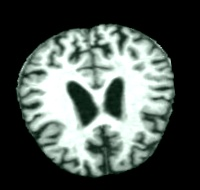

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 602ms/step


'Moderate Demented'

In [170]:
# Predicting the class of a new image using the Random Forest Classifier:
img_path = r"d:\dev\ML lab\Final Project\AlzheimerProject\AlzheimerDataset\MildDemented\0a3cdf7b-d2e9-4519-870b-00dc0bb4658b.jpg"
prediction_RandomForest = PredictNewInstance(img_path, optimizedRandomForest, showImage=True)
prediction_RandomForest[0]

## Exporting the optimized Random Forest Classifier to disk:

In [179]:
# Exporting the optimized Random Forest Classifier:
import joblib

# Save the model to disk
try:
    joblib.dump(optimizedRandomForest, r"d:\dev\ML lab\Final Project\AlzheimerProject\Models\optimizedRandomForest.pkl")
    print("Model saved successfully.")
except Exception as e:
    print("Creating the save directory.")
    os.mkdir(r"d:\dev\ML lab\Final Project\AlzheimerProject\Models")
    joblib.dump(optimizedRandomForest, r"d:\dev\ML lab\Final Project\AlzheimerProject\Models\optimizedRandomForest.pkl")
    print("Model saved successfully.")

Model saved successfully.


## XGBoost Classifier Optimized:
#### Plugging the optimized hyperparameters and training on the full dataset.

In [172]:
# Initializing the XGBoost Classifier with the tuned hyperparameters:
optimizedXGBoost = XGBClassifier(
    booster=bestParamsXGBoostClassifier["booster"],
    n_estimators=bestParamsXGBoostClassifier["n_estimators"],
    max_depth=bestParamsXGBoostClassifier["max_depth"],
    learning_rate=bestParamsXGBoostClassifier["learning_rate"],
    subsample=bestParamsXGBoostClassifier["subsample"],
    colsample_bytree=bestParamsXGBoostClassifier["colsample_bytree"],
    gamma=bestParamsXGBoostClassifier["gamma"],
    reg_alpha=bestParamsXGBoostClassifier["reg_alpha"],
    reg_lambda=bestParamsXGBoostClassifier["reg_lambda"],
    eval_metric="mlogloss",
    random_state=42,
    n_jobs=-1,
    verbosity=0,
)

In [173]:
# Label encoding the labels:
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.transform(y_test)

In [174]:
# Fitting the optimized XGBoost Classifier on the full dataset:
optimizedXGBoost.fit(X_train, y_train_encoded)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8888888888888888, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='mlogloss', feature_types=None, gamma=0.0,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.25999999999999995,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=-1,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [175]:
# Metrics for the optimized XGBoost Classifier trained on the full dataset:
MetricsReport(optimizedXGBoost, X_test, y_test_encoded)

Accuracy:   0.92
Precision:  0.92
Recall:     0.92
F1-score:   0.92
AUC:        0.99


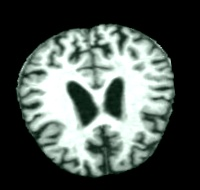

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step


'Mild Demented'

In [176]:
# Predicting the class of a new image using the XGBoost Classifier:
img_path = r"d:\dev\ML lab\Final Project\AlzheimerProject\AlzheimerDataset\MildDemented\0a3cdf7b-d2e9-4519-870b-00dc0bb4658b.jpg"
prediction_XGBoost = PredictNewInstance(img_path, optimizedXGBoost, showImage=True)
encoder.inverse_transform(prediction_XGBoost)[0]

## Exporting the optimized XGBoost classifier to disk:

In [180]:
# Save the model to disk
import joblib

try:
    joblib.dump(
        optimizedXGBoost,
        r"d:\dev\ML lab\Final Project\AlzheimerProject\Models\optimizedXGBoost.pkl",
    )
    print("Model saved successfully.")
except Exception as e:
    print("Creating the save directory.")
    os.mkdir(r"d:\dev\ML lab\Final Project\AlzheimerProject\Models")
    joblib.dump(
        optimizedXGBoost,
        r"d:\dev\ML lab\Final Project\AlzheimerProject\Models\optimizedXGBoost.pkl",
    )
    print("Model saved successfully.")

Model saved successfully.


In [ ]:
import joblib
from fastapi import FastAPI, File, UploadFile
from fastapi.responses import JSONResponse
import numpy as np
from skimage import io, color
from skimage.transform import resize
from skimage.feature import hog
import cv2
import logging

# Load the model
model = joblib.load(
    r"d:\dev\ML lab\Final Project\AlzheimerProject\Models\optimizedRandomForest.pkl"
)

# Initialize the FastAPI app
app = FastAPI()

# Setup logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)


# Define the root endpoint to verify the server is running
@app.get("/")
def read_root():
    return {"message": "Welcome to the Random Forest Classifier API!"}


# Preprocess the image (resize and extract HOG features)
def preprocess_image(image: np.ndarray) -> np.ndarray:
    try:
        img_resized = resize(image, (64, 64), anti_aliasing=True)
        if len(img_resized.shape) == 3:
            img_resized = color.rgb2gray(img_resized)
        features = hog(
            img_resized,
            pixels_per_cell=(8, 8),
            cells_per_block=(2, 2),
            feature_vector=True,
        )
        return features
    except Exception as e:
        logger.error(f"Error in preprocessing image: {e}")
        raise


# Define the prediction route that accepts an image file
@app.post("/predict")
async def predict(file: UploadFile = File(...)):
    try:
        # Read the image file
        logger.info("Reading the uploaded file...")
        file_bytes = await file.read()
        np_arr = np.frombuffer(file_bytes, np.uint8)
        image = cv2.imdecode(np_arr, cv2.IMREAD_COLOR)
        # convert the image to image:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        
        if image is None:
            raise ValueError("Image decoding failed")

        # Preprocess the image
        logger.info("Preprocessing the image...")
        # features = preprocess_image(image).reshape(1, -1)

        # Make prediction
        logger.info("Making prediction...")
        prediction = PredictNewInstance(image, model, showImage=True)
        return {"prediction": prediction.tolist()}
    except Exception as e:
        logger.error(f"Error in prediction: {e}")
        return JSONResponse(status_code=500, content={"message": str(e)})


# Run the FastAPI app
if __name__ == "__main__":
    import uvicorn
    import sys

    if "ipykernel" in sys.modules:
        import nest_asyncio

        nest_asyncio.apply()
        uvicorn.run(app, host="0.0.0.0", port=8000)
    else:
        uvicorn.run(app, host="0.0.0.0", port=8000)

In [1]:
import joblib
from fastapi import FastAPI, File, UploadFile
from fastapi.responses import JSONResponse
import numpy as np
from skimage import io, color
from skimage.transform import resize
from skimage.feature import hog
import cv2
import logging

# Load the model
model = joblib.load(
    r"d:\dev\ML lab\Final Project\AlzheimerProject\Models\optimizedXGBoost.pkl"
)

# Initialize the FastAPI app
app = FastAPI()

# Setup logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)


# Define the root endpoint to verify the server is running
@app.get("/")
def read_root():
    return {"message": "Welcome to the Random Forest Classifier API!"}


# Preprocess the image (resize and extract HOG features)
def preprocess_image(image: np.ndarray) -> np.ndarray:
    try:
        img_resized = resize(image, (64, 64), anti_aliasing=True)
        if len(img_resized.shape) == 3:
            img_resized = color.rgb2gray(img_resized)
        features = hog(
            img_resized,
            pixels_per_cell=(8, 8),
            cells_per_block=(2, 2),
            feature_vector=True,
        )
        return features
    except Exception as e:
        logger.error(f"Error in preprocessing image: {e}")
        raise


# Define the prediction route that accepts an image file
@app.post("/predict")
async def predict(file: UploadFile = File(...)):
    try:
        # Read the image file
        logger.info("Reading the uploaded file...")
        file_bytes = await file.read()
        np_arr = np.frombuffer(file_bytes, np.uint8)
        image = cv2.imdecode(np_arr, cv2.IMREAD_COLOR)

        if image is None:
            raise ValueError("Image decoding failed")

        # Preprocess the image
        logger.info("Preprocessing the image...")
        features = preprocess_image(image).reshape(1, -1)

        # Make prediction
        logger.info("Making prediction...")
        prediction = model.predict(features)
        return {"prediction": prediction.tolist()}
    except Exception as e:
        logger.error(f"Error in prediction: {e}")
        return JSONResponse(status_code=500, content={"message": str(e)})


# Run the FastAPI app
if __name__ == "__main__":
    import uvicorn
    import sys

    if "ipykernel" in sys.modules:
        import nest_asyncio

        nest_asyncio.apply()
        uvicorn.run(app, host="0.0.0.0", port=8000)
    else:
        uvicorn.run(app, host="0.0.0.0", port=8000)

INFO:     Started server process [5628]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://0.0.0.0:8000 (Press CTRL+C to quit)


INFO:     127.0.0.1:61758 - "GET /docs HTTP/1.1" 200 OK
INFO:     127.0.0.1:61760 - "GET /openapi.json HTTP/1.1" 200 OK


INFO:     Shutting down
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:     Finished server process [5628]


KeyboardInterrupt: 